# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [23]:
import pandas as pd
import plotly.express as px

Só uma Pequena alteração no dataframe porque estava tudo como string eu removi os parenteses para que fossem criados agora como numeros inteiros

In [21]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico', 'Engenheiro', 'Estudante', 'Estudante'],
    'Salário': [4500, 8000, 5000, 10000, 12000, 15000, 1200, 1500],
    'Limite_Credito': [2500, 4000, 4000, 1000, 10000, 2000, 500, 250],
    'Historico_Inadimplencia': [0, 0, 0, 1, 0, 1, 0, 1],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento', 'Solteiro', 'Solteiro', 'Solteiro'],
    'Imovel_Proprio': [0, 0, 0, 1, 1, 1, 0, 0]
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

<h2><b>Aqui conseguimos analisar que um dos fatores para que o limite de crédito seja alto é a média salarial, que apesar de ser a maioria não são todas as pessoas que possuem salários altos e que também possuem limites de créditos maiores</b></h2>

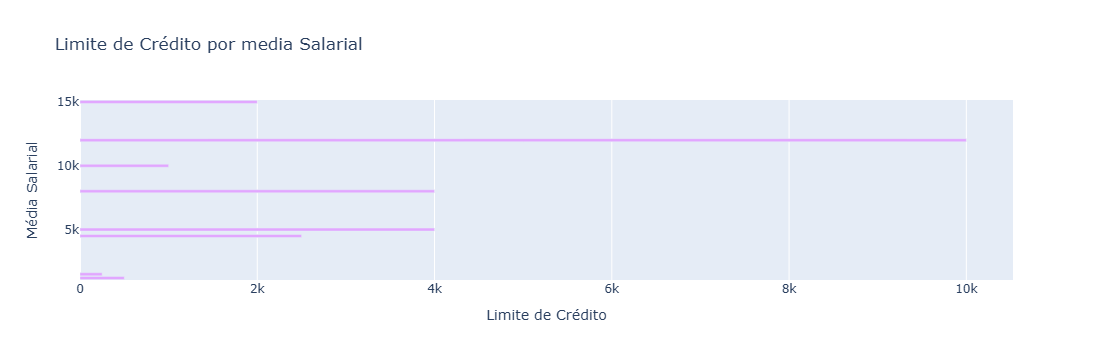

In [46]:
#Primeiro vamos comparar o limite de crédito de cada faixa salárial para entender quais tem mais limite e quais tem menos
salario_profissao = df.groupby('Salário')['Limite_Credito'].mean().reset_index()

fig = px.bar(salario_profissao,x='Limite_Credito',y='Salário', orientation='h',
             title='Limite de Crédito por media Salarial',
             labels={'Limite_Credito': 'Limite de Crédito', 'Salário': 'Média Salarial'}, color_discrete_sequence=['#e2a6ff'])

fig.show()

<h2><b>Outro fator interessante é a taxa de inadimplência de acordo com a profissão exercida </b></h2>

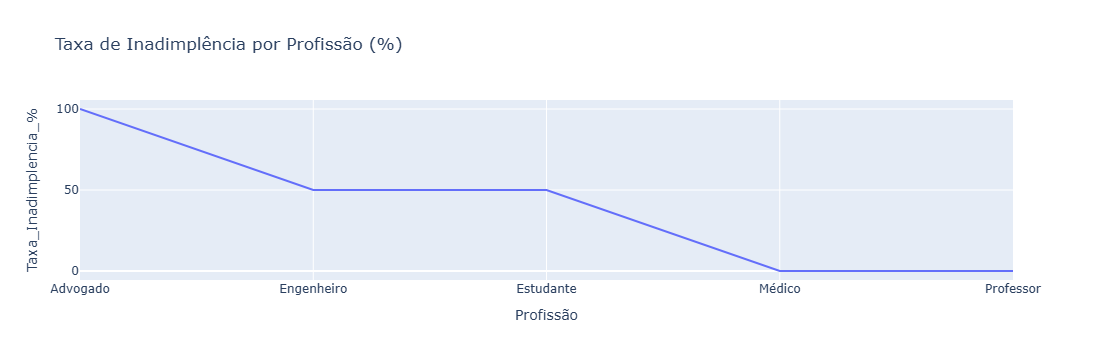

In [48]:
inadimplencia_profissao  = df.groupby('Profissão')['Historico_Inadimplencia'].mean().reset_index()

inadimplencia_profissao['Taxa_Inadimplencia_%'] = (
    inadimplencia_profissao['Historico_Inadimplencia'] * 100
)

fig = px.line(
    inadimplencia_profissao,
    x='Profissão',
    y='Taxa_Inadimplencia_%',
    title='Taxa de Inadimplência por Profissão (%)')

fig.show()

<h2>Comparação da taxa de inadimplência entre pessoas que possuem ou não Imóvel proprio</h2>

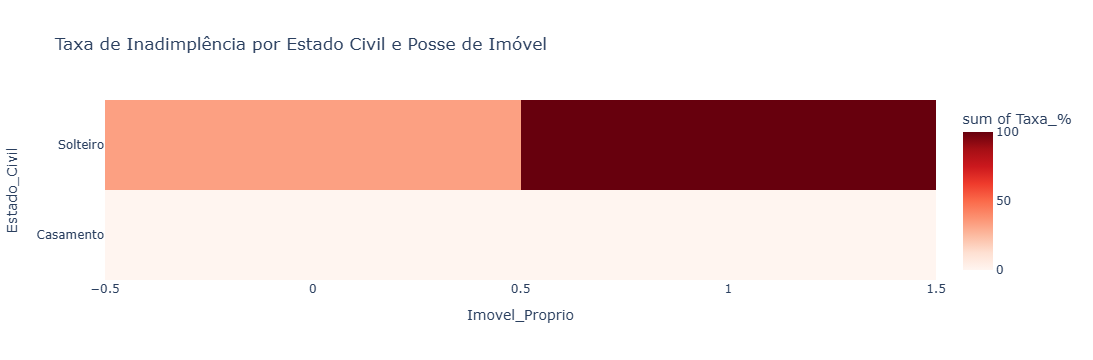

In [49]:
heatmap_data = (
    df.groupby(['Estado_Civil', 'Imovel_Proprio'])['Historico_Inadimplencia']
      .mean()
      .reset_index()
)

heatmap_data['Taxa_%'] = heatmap_data['Historico_Inadimplencia'] * 100

fig = px.density_heatmap(
    heatmap_data,
    x='Imovel_Proprio',
    y='Estado_Civil',
    z='Taxa_%',
    color_continuous_scale='Reds',
    title='Taxa de Inadimplência por Estado Civil e Posse de Imóvel'
)

fig.show()

<h2>Neste Ultimo Gráfico conseguimos constatar que a taxa de inadimplência é muito menor dentre aqueles que possuem imóvel proprio</h2>

Justificativa de uso dos visuáis: No primeiro gráfico eu escolhi utilizar o gráfico de barras horizontais para uma melhor visualização e disposição dos valores
No segundo gráfico A minha escolha de um gráfico de linha foi para demonstrar a porcentagem de inadimplência dentre todas as profissões no data frame
No Terceiro grafico eu fiz a escolha do mapa de calor para demonstrar